In [52]:
# Test prediction using local site FedVAE-generated samples
# Currently and bottom: t-SNE of all FedVAE sites and all FC
# If want to go back to testing re-check code and commented out code

import random
import numpy as np

demo_types = ['continuous', 'categorical', 'categorical', 'categorical']
demo = [[], [], [], []]
N = int(1000/4)

for i in range(N):
    age = random.randint(15,65)
    sex = random.randint(0,1)
    race = random.randint(0,1)
    diag = random.randint(0,1)*3
    demo[0].append(age)
    demo[1].append(sex)
    demo[2].append(race)
    demo[3].append(diag)

fc = {'Baltimore': [], 'Chicago': [], 'Dallas': [], 'Detroit': [], 'Hartford': []}

for i in range(len(demo)):
    demo[i] = np.array(demo[i])

print('Done')

Done


In [53]:
from demovae import DemoVAE

mydemo = demo #[demo[1], demo[2], demo[3]]
mydemo_types = demo_types #[demo_types[1], demo_types[2], demo_types[3]]

for loc in fc.keys():
    path = f'/home/anton/Documents/Tulane/Research/FederatedVAE/BSNIP_Models/{loc}.pkl'
    
    vae = DemoVAE(pperiod=100, use_cuda=True, nepochs=5000, latent_dim=30, weight_decay=0, lr=5e-5, loss_rec_mult=500, loss_pred_mult=.01)
    vae.load(path)
    fc[loc] = vae.transform(N, mydemo, mydemo_types)
    print(fc[loc].shape)

/home/anton/.local/lib/python3.13/site-packages/demovae/sklearn.py:114: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dct = torch.load(path)


(250, 34716)
(250, 34716)
(250, 34716)
(250, 34716)
(250, 34716)


In [54]:
# Create a single model using 4 of the 5 sites

loc = 'Baltimore'
sites = ['Baltimore', 'Chicago', 'Dallas', 'Detroit', 'Hartford']
fc_all = []
demo_all = [[] for _ in range(len(demo))]

for site in sites:
    fc_all.append(fc[site])
    for i in range(len(demo)):
        demo_all[i].append(demo[i])

for i in range(len(demo)):
    demo_all[i] = np.concatenate(demo_all[i])

fc_all = np.concatenate(fc_all)

print(demo_all)
print(demo_all[0].shape)
print(fc_all.shape)

[array([64, 32, 26, ..., 55, 53, 40], shape=(1250,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1250,)), array([0, 0, 0, ..., 1, 0, 0], shape=(1250,)), array([0, 0, 0, ..., 0, 3, 3], shape=(1250,))]
(1250,)
(1250, 34716)


In [55]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [72]:
# Get real data

import pickle
import numpy as np

diag_map = {'SZP': 0, 'BPP': 1, 'SADBPP': 2, 'SADDEPP': 2, 'NC': 3, 'SADDEPR': 3, 'SADBPR': 3, 'BPR': 3, 'SZR': 3} 
site_map = {'Baltimore': 0, 'Chicago': 1, 'Dallas': 2, 'Detroit': 3, 'Hartford': 4}
# Age sex race diagnosis
demo_types = ['continuous', 'categorical', 'categorical', 'categorical']
demo_test = [[], [], [], []]
fc_test = []
demo_train = [[], [], [], []]
fc_train = []

bsnipdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/BSNIP/'
bsnip = pickle.load(open(f'{bsnipdir}/demographics.pkl', 'rb'))

a,b = np.triu_indices(264,1)

site_counts = np.zeros(5)
site_fc = [[],[],[],[],[]]

for sub in bsnip['Age_cal']:
    parts = sub.split('.')
    if parts[0] not in site_map.keys():
        continue
    # if parts[0] != loc:
    #     continue
    age = bsnip['Age_cal'][sub]
    sex = int(bsnip['sex'][sub] == 's1.0')
    race = int(bsnip['Race'][sub] == 'AA')
    diag = bsnip['DXGROUP_1'][sub]
    diag = diag_map[diag]
    if diag != 0 and diag != 3:
        continue
    if parts[0] == 'bad': #loc:
        demo_test[0].append(age)
        demo_test[1].append(sex)
        demo_test[2].append(race)
        demo_test[3].append(diag)
        p = np.load(f'{bsnipdir}/fc/{sub}_task-unk_fc.npy')
        p = remap(vec2mat(p))[a,b]
        fc_test.append(p)
    else:
        demo_train[0].append(age)
        demo_train[1].append(sex)
        demo_train[2].append(race)
        demo_train[3].append(diag)
        p = np.load(f'{bsnipdir}/fc/{sub}_task-unk_fc.npy')
        p = remap(vec2mat(p))[a,b]
        fc_train.append(p)
        site_counts[site_map[parts[0]]] += 1
        site_fc[site_map[parts[0]]].append(p)

# fc_test = np.stack(fc_test)
fc_train = np.stack(fc_train)
for i in range(len(demo_test)):
    # demo_test[i] = np.array(demo_test[i])
    demo_train[i] = np.array(demo_train[i])
    # print(demo_test[i])

for i in range(len(site_fc)):
    site_fc[i] = np.stack(site_fc[i])

# print(fc_test.shape)
print(fc_train.shape)

(907, 34716)


In [12]:
from sklearn.linear_model import LogisticRegression

# # xtr = vae.get_latents(fc_all)
# xtr = np.concatenate([fc_all, np.stack([demo_all[0], demo_all[1], demo_all[2]], axis=1)], axis=1)
xtr = fc_all
# print(xtr.shape)

# # xt = vae.get_latents(fc_test)
# xt = np.concatenate([fc_test, np.stack([demo_test[0], demo_test[1], demo_test[2]], axis=1)], axis=1)
xt = fc_test
# print(xt.shape)

reg = LogisticRegression(C=100, max_iter=1000).fit(xtr, demo_all[3])
yhat = reg.predict(xt)
acc = np.mean(yhat == demo_test[3])
print(acc)

0.7389380530973452


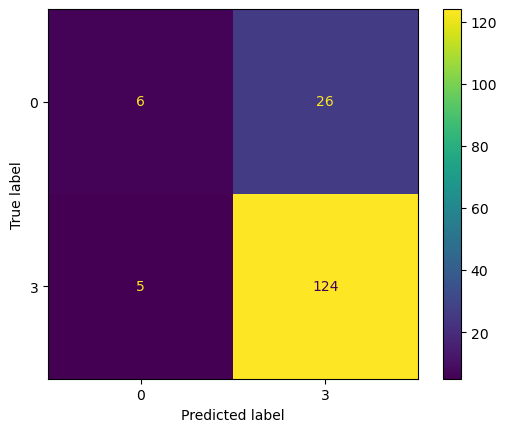

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(demo_test[3], yhat)

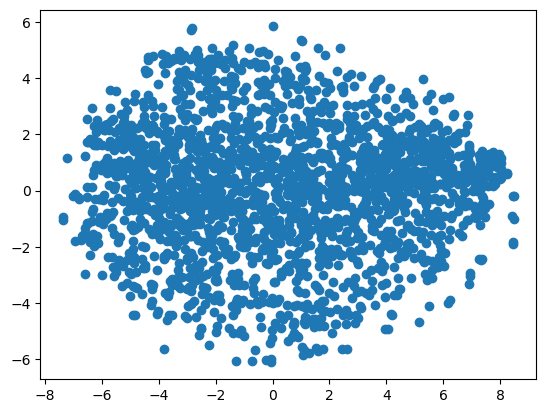

In [79]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Nreal = len(fc_train)
Nsynth = len(fc_all)

x = np.concatenate(site_fc + [fc_all])

z = TSNE(n_components=2, perplexity=200).fit_transform(x)
plt.scatter(z[:,0], z[:,1])

/tmp/ipykernel_138806/3426685513.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


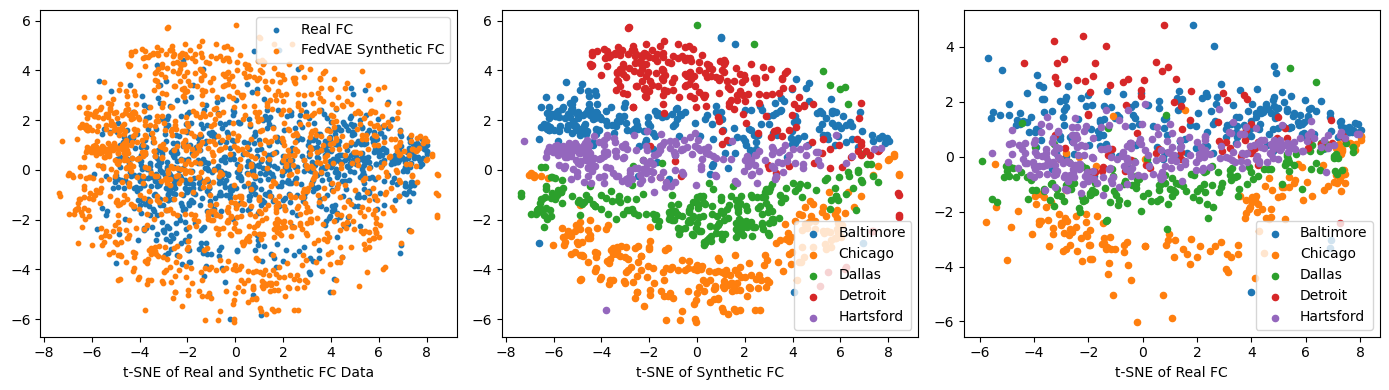

In [84]:
N = 250
sites = ['Baltimore', 'Chicago', 'Dallas', 'Detroit', 'Hartsford']

fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].scatter(z[:Nreal,0],z[:Nreal,1],s=10,label='Real FC')
ax[0].scatter(z[Nreal:,0],z[Nreal:,1],s=10,label='FedVAE Synthetic FC')

ax[0].legend()
ax[0].set_xlabel('t-SNE of Real and Synthetic FC Data')

for i in range(5):
    ax[1].scatter(z[Nreal+N*i:Nreal+N*(i+1),0], z[Nreal+N*i:Nreal+N*(i+1),1],s=20,label=sites[i])

ax[1].legend()
ax[1].set_xlabel('t-SNE of Synthetic FC')

count = 0
for i in range(5):
    sc = int(site_counts[i])
    ax[2].scatter(z[count:count+sc,0],z[count:count+sc,1],s=20,label=sites[i])
    count += sc

ax[2].legend()
ax[2].set_xlabel('t-SNE of Real FC')

fig.tight_layout()
fig.savefig('/home/anton/Documents/Tulane/Research/FederatedVAE/Figures/tsne.pdf')
fig.show()